In [519]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

round_digit = 4

In [520]:
# Read input data from csv file

df = pd.read_csv('input.csv')

In [521]:
# Function to standardize a data vector

def standardize(data: np.array) -> np.array:
    return (data - np.mean(data)) / (np.std(data))

In [522]:
# Function to normalize a data vector

def normalize(data: np.array) -> np.array:
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [523]:
data = df[['Outstate', 'F.Undergrad', 'Grad.Rate']]
data = data.to_numpy()

#data = standardize(data)

data.shape[0]

777

In [524]:
def is_terminated(oldCentroids, centroids):
    for i in range(centroids.shape[0]):
        for j in range(centroids.shape[1]):
            if abs(oldCentroids[i][j] - centroids[i][j]) > 0.01:
                return False
    return True

In [525]:
def dist(data, centroids):
    dist_sum = 0
    for i in range(data.shape[0]):
        dist_sum += (data[i] - centroids[i]) ** 2
    return np.sqrt(dist_sum)

In [526]:
def get_labels(data, centroids):
    labels = np.empty(data.shape[0])
    distances = np.full(data.shape[0], float('inf'))
    
    for i in range(data.shape[0]):
        for c in range(centroids.shape[0]):
            d = dist(data[i], centroids[c])
            if d < distances[i]:
                distances[i] = d
                labels[i] = c
    
    return labels

In [527]:
def get_centroids(data, labels, k):
    
    #error
    centroids = np.array([data[random.randint(0, data.shape[0] - 1)] for i in range(k)])

    for c in range(0, k):
        #centroid_prod = np.empty(centroids.shape[1])
        centroid_sum = np.empty(centroids.shape[1])
        centroid_cnt = 0
        for i in range(labels.shape[0]):
            if labels[i] == c:
                centroid_cnt += 1
                centroid_sum += data[i]
                #centroid_prod = centroid_prod * data[i]
        centroids[c] = centroid_sum / centroid_cnt
        #centroids[c] = np.power(centroid_prod, 1/centroid_prod.shape[0])
    
    return centroids

In [528]:
def k_means(data, k):
    centroids = np.array([data[random.randint(0, data.shape[0] - 1)] for i in range(k)])           
    
    
    #error: possible same randoms
    oldCentroids = np.array([data[random.randint(0, data.shape[0] - 1)] for i in range(k)])
    inter = 0
    while not is_terminated(oldCentroids, centroids) and inter < 2:
        inter += 1
        oldCentroids = centroids
        labels = get_labels(data, centroids)
        
        centroids = get_centroids(data, labels, k)
        
        centroids = np.sort(centroids, axis=0)
        oldCentroids = np.sort(oldCentroids, axis=0)
        
        print("interation: ",inter)
        
    print(oldCentroids ,"\n")
    #print(centroids)
    return centroids

In [529]:
centroids = k_means(data, 2)
print(centroids)

interation:  1
interation:  2
[[ 7273  3144    56]
 [13177  4184    73]] 

[[13776  3607    74]
 [13847  6530   106]]


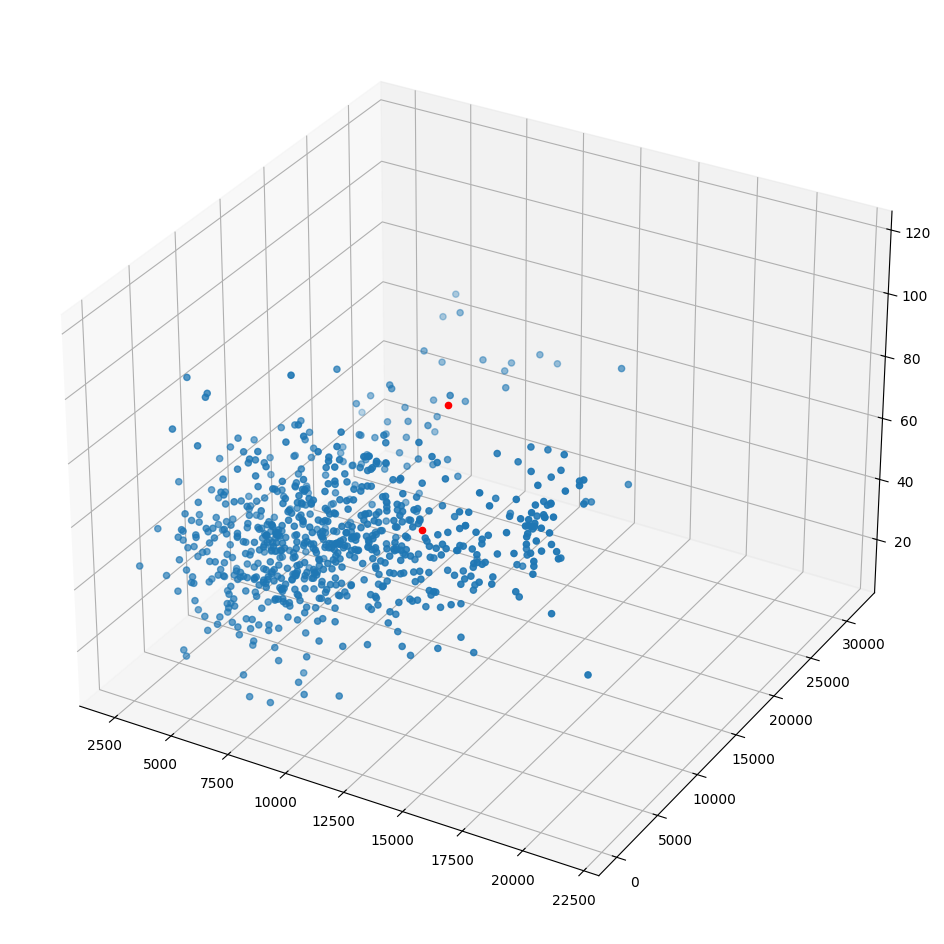

In [530]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(df.loc[:, 'Outstate'], df.loc[:, 'F.Undergrad'], df.loc[:, 'Grad.Rate'])
for i in range(centroids.shape[0]):
    ax.scatter(centroids[i][0], centroids[i][1], centroids[i][2], color='red')
    
plt.show()